In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.optics

This example introduces the module deeptrack.optics

## What is an optical device?

Optical devices are implementations of the abstract class `Features` (see also [features_example](features_example.ipynb)) that image their input through some optical setup. They treat the input as a discretization of the complex field scattered by a sample, and, unless otherwise stated, assume the illumination is incoherent. 

The preferred syntax to call an optical device on a feature series `F` is `optics(F)`. Using this syntax, the properties of the optical device is accessible by `F`. However, also the syntax `F + optics` is possible, but in this case, the properties of the optical device are not accessible by `F`.

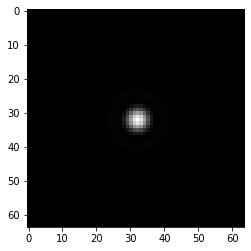

In [2]:
from deeptrack.optics import Fluorescence
from deeptrack.scatterers import PointParticle

import numpy as np
import matplotlib.pyplot as plt

optics = Fluorescence(
    NA=0.7,                       # Numerical aperture
    wavelength=660e-9,            # Wavelength of scatterer
    resolution=1e-6,              # Pixel size of the camera. Also determines z-resolution
    magnification=10,             # Magnification of the optical aperature
    refractive_index_medium=1.33, # Refractive index of the medium
    upscale=2,                    # Upscales the pupil function for accuracy
    output_region=(0, 0, 64, 64)  # Extracts a part of the output image (x, y, width, height)
)

scatterer = PointParticle(
    intensity=100,         # Squared magnitude of the field. 
    position_unit="pixel", # Units of position (default meter)
    position=(32, 32) ,    # Position of the particle
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")